# Project: The Impact of Vaccines on Covid-19 Death Rates

## Project Introduction:

In this project, we will be using Covid and Vaccine data from WHO and combine them to determine things about the covid data, such as how effective are the vaccines, which vaccines are the best, death rates per country based on vaccines given, etc... 

First, lets start by importing the necessary libraries for Data Analysis and Visualization

In [345]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

Now lets load the Covid and Vaccine data from WHO.

In [346]:
main = pd.read_csv("WHO-COVID-19-global-data.csv")
vaccine = pd.read_csv("vaccination-data.csv")
vaccine

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,2/27/2022,5535254,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
1,Albania,ALB,EURO,REPORTING,2/20/2022,2707658,1284034.0,94.100,45.118,1192155.0,41.889,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",1/13/2021,5.0
2,Algeria,DZA,AFRO,REPORTING,2/20/2022,13631683,7456361.0,31.086,17.004,6076272.0,13.857,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",1/30/2021,4.0
3,American Samoa,ASM,WPRO,REPORTING,2/16/2022,85050,42212.0,154.084,76.475,37805.0,68.491,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",12/21/2020,3.0
4,Andorra,AND,EURO,REPORTING,2/13/2022,142420,57797.0,184.300,75.872,53250.0,69.903,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",1/20/2021,3.0
5,Angola,AGO,AFRO,REPORTING,2/22/2022,16259606,10591264.0,49.472,32.225,5448403.0,16.577,SII - Covishield,3/10/2021,1.0
6,Anguilla,AIA,AMRO,REPORTING,2/25/2022,22165,10370.0,147.747,69.124,9531.0,63.532,"AstraZeneca - Vaxzevria,Pfizer BioNTech - Comi...",2/5/2021,2.0
7,Antigua and Barbuda,ATG,AMRO,REPORTING,2/25/2022,124726,63582.0,127.364,64.927,61144.0,62.437,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",3/1/2021,6.0
8,Argentina,ARG,AMRO,REPORTING,2/25/2022,93008081,40572052.0,205.789,89.770,36237826.0,80.180,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",12/29/2020,7.0
9,Armenia,ARM,EURO,REPORTING,2/13/2022,1971565,1080404.0,66.500,36.460,872336.0,29.439,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",6/16/2021,5.0


## Changes Made:

Now we will merge both of the datasets based on Country and WHO_REGION. This will give us a better way to understand both of the vaccine and Covid data better side-by-side.

In [374]:
main = main.rename(columns={"WHO_region": "WHO_REGION", "Country": "COUNTRY"})
main = main.merge(vaccine, how='outer', on=['WHO_REGION', 'COUNTRY'])
main = main.dropna(subset=['Date_reported'])
# main.loc[:, "COUNTRY"].value_counts()
# main

In [375]:
main.loc[:, "COUNTRY"].value_counts()          # There are a total of 789 dates for 237 countries
main.head(10)

,Date_reported,Country_code,COUNTRY,WHO_REGION,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,ISO3,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,1/3/2020,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,AFG,REPORTING,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
1,1/4/2020,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,AFG,REPORTING,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
2,1/5/2020,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,AFG,REPORTING,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
3,1/6/2020,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,AFG,REPORTING,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
4,1/7/2020,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,AFG,REPORTING,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
5,1/8/2020,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,AFG,REPORTING,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
6,1/9/2020,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,AFG,REPORTING,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
7,1/10/2020,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,AFG,REPORTING,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
8,1/11/2020,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,AFG,REPORTING,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
9,1/12/2020,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,AFG,REPORTING,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0


Assumption 1: We changed the WHO_region and Country in **main** to match the WHO_REGION and COUNTRY in **vaccine**. <br>
Assumption 2: We will analyze/visualize data for 237 countries featured in the main dataset.

## Data Cleaning:

In [349]:
if 'Country_code' in main.columns and 'ISO3' in main.columns and 'DATA_SOURCE' in main.columns:
    main = main.drop(columns=['Country_code', 'ISO3', 'DATA_SOURCE'])   # Cleaned Data
print(main.head())

  Date_reported Country_code      Country WHO_region  New_cases  \
0      1/3/2020           AF  Afghanistan       EMRO          0   
1      1/4/2020           AF  Afghanistan       EMRO          0   
2      1/5/2020           AF  Afghanistan       EMRO          0   
3      1/6/2020           AF  Afghanistan       EMRO          0   
4      1/7/2020           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0  


In [350]:
print(main.head(150))

    Date_reported Country_code      Country WHO_region  New_cases  \
0        1/3/2020           AF  Afghanistan       EMRO          0   
1        1/4/2020           AF  Afghanistan       EMRO          0   
2        1/5/2020           AF  Afghanistan       EMRO          0   
3        1/6/2020           AF  Afghanistan       EMRO          0   
4        1/7/2020           AF  Afghanistan       EMRO          0   
..            ...          ...          ...        ...        ...   
145     5/27/2020           AF  Afghanistan       EMRO        548   
146     5/28/2020           AF  Afghanistan       EMRO        637   
147     5/29/2020           AF  Afghanistan       EMRO        643   
148     5/30/2020           AF  Afghanistan       EMRO        784   
149     5/31/2020           AF  Afghanistan       EMRO        651   

     Cumulative_cases  New_deaths  Cumulative_deaths  
0                   0           0                  0  
1                   0           0                  0  
2     

**NOTE:**<br>
Lastly we will remove redundant/replicated data and put them in seperate Dataframes based on country (this includes the first_vaccine_date, number_vaccines_types_used and date_updated).This will help us get better understandings based on comparisons between different attributes based on Country.

In [351]:
#make table for all first_vaccine_dates per country and get rid of it in the main dataset to have less duplicate redundant data
if 'FIRST_VACCINE_DATE' in main.columns:
    first_vaccine_dates = main[['COUNTRY', "FIRST_VACCINE_DATE"]]
    first_vaccine_dates = first_vaccine_dates.drop_duplicates()
    first_vaccine_dates['FIRST_VACCINE_DATE'] = pd.to_datetime(first_vaccine_dates['FIRST_VACCINE_DATE'])
if 'FIRST_VACCINE_DATE' in main.columns:
    main = main.drop(columns=['FIRST_VACCINE_DATE'])
if 'DATE_UPDATED' in main.columns:
    main = main.drop(columns=['DATE_UPDATED'])
first_vaccine_dates = first_vaccine_dates.sort_values(by='FIRST_VACCINE_DATE')

**NOTE:**<br>
make datasets to show total cases and total deaths to understand the severity of Pandemic.<br>
dataset with just Country, Cumlative_cases, date repoted<br>
Team member: Shambhavi Danayak

In [361]:
df= main[["Country","Date_reported", "Cumulative_cases"]]
df.head()
df[df.Cumulative_cases != 0].reset_index()

,index,Country,Date_reported,Cumulative_cases
0,52,Afghanistan,2/24/2020,5
1,53,Afghanistan,2/25/2020,5
2,54,Afghanistan,2/26/2020,5
3,55,Afghanistan,2/27/2020,5
4,56,Afghanistan,2/28/2020,5
...,...,...,...,...
159292,185092,Zimbabwe,2/17/2022,232213
159293,185093,Zimbabwe,2/18/2022,232598
159294,185094,Zimbabwe,2/19/2022,233030
159295,185095,Zimbabwe,2/20/2022,233224


**NOTE:**<br>
make datasets to show total cases and total deaths to understand the severity of Pandemic.<br>
dataset with just Country, Cumlative_deaths, date repoted<br>
Team member: Shambhavi Danayak

In [360]:
dfCumDeaths= main[["Country","Date_reported","Cumulative_deaths"]]
dfCumDeaths.head()
dfCumDeaths[dfCumDeaths.Cumulative_deaths!=0].reset_index()

,index,Country,Date_reported,Cumulative_deaths
0,80,Afghanistan,3/23/2020,1
1,81,Afghanistan,3/24/2020,1
2,82,Afghanistan,3/25/2020,1
3,83,Afghanistan,3/26/2020,2
4,84,Afghanistan,3/27/2020,2
...,...,...,...,...
141339,185092,Zimbabwe,2/17/2022,5379
141340,185093,Zimbabwe,2/18/2022,5381
141341,185094,Zimbabwe,2/19/2022,5385
141342,185095,Zimbabwe,2/20/2022,5386


## Exploratory Data Analysis:

In [362]:
main.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,1.850970e+05,1.850970e+05,185097.000000,185097.000000
mean,2.287653e+03,5.027141e+05,31.758094,10487.416474
std,1.571867e+04,2.774388e+06,166.263364,49849.100062
min,-3.295200e+04,0.000000e+00,-4214.000000,0.000000
25%,0.000000e+00,1.290000e+02,0.000000,1.000000
50%,2.100000e+01,8.577000e+03,0.000000,122.000000
75%,4.910000e+02,1.330880e+05,6.000000,2302.000000
max,1.327952e+06,7.772948e+07,8786.000000,926287.000000


In [363]:
main.head(100)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,1/3/2020,AF,Afghanistan,EMRO,0,0,0,0
1,1/4/2020,AF,Afghanistan,EMRO,0,0,0,0
2,1/5/2020,AF,Afghanistan,EMRO,0,0,0,0
3,1/6/2020,AF,Afghanistan,EMRO,0,0,0,0
4,1/7/2020,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
95,4/7/2020,AF,Afghanistan,EMRO,30,367,4,11
96,4/8/2020,AF,Afghanistan,EMRO,56,423,3,14
97,4/9/2020,AF,Afghanistan,EMRO,21,444,1,15
98,4/10/2020,AF,Afghanistan,EMRO,77,521,0,15


In [364]:
vaccine.head(10)

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,2/27/2022,5535254,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
1,Albania,ALB,EURO,REPORTING,2/20/2022,2707658,1284034.0,94.100,45.118,1192155.0,41.889,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",1/13/2021,5.0
2,Algeria,DZA,AFRO,REPORTING,2/20/2022,13631683,7456361.0,31.086,17.004,6076272.0,13.857,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",1/30/2021,4.0
3,American Samoa,ASM,WPRO,REPORTING,2/16/2022,85050,42212.0,154.084,76.475,37805.0,68.491,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",12/21/2020,3.0
4,Andorra,AND,EURO,REPORTING,2/13/2022,142420,57797.0,184.300,75.872,53250.0,69.903,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",1/20/2021,3.0
5,Angola,AGO,AFRO,REPORTING,2/22/2022,16259606,10591264.0,49.472,32.225,5448403.0,16.577,SII - Covishield,3/10/2021,1.0
6,Anguilla,AIA,AMRO,REPORTING,2/25/2022,22165,10370.0,147.747,69.124,9531.0,63.532,"AstraZeneca - Vaxzevria,Pfizer BioNTech - Comi...",2/5/2021,2.0
7,Antigua and Barbuda,ATG,AMRO,REPORTING,2/25/2022,124726,63582.0,127.364,64.927,61144.0,62.437,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",3/1/2021,6.0
8,Argentina,ARG,AMRO,REPORTING,2/25/2022,93008081,40572052.0,205.789,89.770,36237826.0,80.180,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",12/29/2020,7.0
9,Armenia,ARM,EURO,REPORTING,2/13/2022,1971565,1080404.0,66.500,36.460,872336.0,29.439,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",6/16/2021,5.0


In [365]:
vaccine.describe()
main.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,1.850970e+05,1.850970e+05,185097.000000,185097.000000
mean,2.287653e+03,5.027141e+05,31.758094,10487.416474
std,1.571867e+04,2.774388e+06,166.263364,49849.100062
min,-3.295200e+04,0.000000e+00,-4214.000000,0.000000
25%,0.000000e+00,1.290000e+02,0.000000,1.000000
50%,2.100000e+01,8.577000e+03,0.000000,122.000000
75%,4.910000e+02,1.330880e+05,6.000000,2302.000000
max,1.327952e+06,7.772948e+07,8786.000000,926287.000000


In [366]:
vaccine.tail()
main.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
185092,2/17/2022,ZW,Zimbabwe,AFRO,350,232213,1,5379
185093,2/18/2022,ZW,Zimbabwe,AFRO,385,232598,2,5381
185094,2/19/2022,ZW,Zimbabwe,AFRO,432,233030,4,5385
185095,2/20/2022,ZW,Zimbabwe,AFRO,194,233224,1,5386
185096,2/21/2022,ZW,Zimbabwe,AFRO,128,233352,0,5386


In [372]:
print(first_vaccine_dates[0:206])
print(first_vaccine_dates[207:len(first_vaccine_dates)])

vaxxedCountries = first_vaccine_dates[0:206]
unvaxxedCountries = first_vaccine_dates[207:len(first_vaccine_dates)]

                            COUNTRY FIRST_VACCINE_DATE
149171                   Seychelles          1/10/2021
171820     Turks and Caicos Islands          1/11/2021
17182                       Bermuda          1/11/2021
75757                     Indonesia          1/13/2021
781                         Albania          1/13/2021
...                             ...                ...
31240                          Chad           6/4/2021
118712                         Niue           6/8/2021
167134                      Tokelau          7/20/2021
32802                         China          7/22/2020
175725  United Republic of Tanzania          7/28/2021

[206 rows x 2 columns]
                                                  COUNTRY FIRST_VACCINE_DATE
20306                              Bosnia and Herzegovina                NaN
39050                                                Cuba                NaN
42174               Democratic People's Republic of Korea                NaN
49984   

## Visualization:

# Visulatization 1: Understanding the Severity of COVID-19 Pandemic
By Shambhavi Danayak
Before starting any ML technique I wanted to create a visuals which will depict the severity of the COVID-19 Pandemic. WHO Dataset consits of a variety of countries and their respective reports starting year 2021 to 2022. My visulalization only focuses on the data reported for the United States to America. The main data was was broken into sub datasets for columns 'Country', 'Cumulative_cases', 'Cumulative_deaths' and 'Date_reported' (Can be seen under data cleaning). <br>
**INFERENCE:** <br>
United States of America started reporting Covid-19 cases during year 2020 and drastically started rising after Jan 2021. From this visual one can clearly make out the fact that COVID-19 surged the most during the year 2021. Since in the line plot there is no retardation, it proves the need to contain the pandemic and prepare treatment for countering the virus.

In [367]:
# Considering only United States of America
import datetime
from datetime import date
dfUSA= df[df['Country']== 'United States of America']
usa=dfUSA[dfUSA.Cumulative_cases!=0].reset_index()
usa.head()
usa.tail() #763

,index,Country,Date_reported,Cumulative_cases
759,177282,United States of America,2/17/2022,77413180
760,177283,United States of America,2/18/2022,77521589
761,177284,United States of America,2/19/2022,77622175
762,177285,United States of America,2/20/2022,77729481
763,177286,United States of America,2/21/2022,77729481


In [368]:
usa['Date_reported']=pd.date_range(start='1/20/2020',end='2/21/2022',freq='D')
usa['Date_reported']= pd.to_datetime(df['Date_reported'])
#usa=usa[0:763]
print(usa.head(10))
print(usa.tail())
usa.describe()

    index                   Country Date_reported  Cumulative_cases
0  176523  United States of America    2020-01-03                 1
1  176524  United States of America    2020-01-04                 1
2  176525  United States of America    2020-01-05                 1
3  176526  United States of America    2020-01-06                 1
4  176527  United States of America    2020-01-07                 1
5  176528  United States of America    2020-01-08                 1
6  176529  United States of America    2020-01-09                 2
7  176530  United States of America    2020-01-10                 2
8  176531  United States of America    2020-01-11                 3
9  176532  United States of America    2020-01-12                 3
      index                   Country Date_reported  Cumulative_cases
759  177282  United States of America    2022-01-31          77413180
760  177283  United States of America    2022-02-01          77521589
761  177284  United States of America    2

,index,Cumulative_cases
count,764.000000,7.640000e+02
mean,176904.500000,2.405770e+07
std,220.692093,2.045222e+07
min,176523.000000,1.000000e+00
25%,176713.750000,4.353821e+06
50%,176904.500000,2.642901e+07
75%,177095.250000,3.632055e+07
max,177286.000000,7.772948e+07


<AxesSubplot:xlabel='Date_reported'>

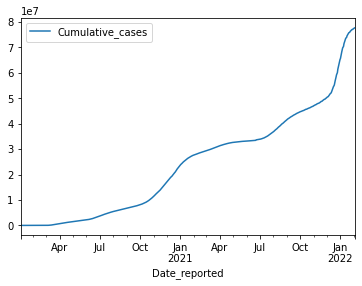

In [369]:
usa.plot.line(x='Date_reported', y='Cumulative_cases')

## Visualization 2: How new cases were effected after the first vaccinations were released 
By William Kopec

What I did in this visualization was to get subdata where I would only get information from the US and use only relevant information for this visualization. After I broke the data into sub-data, I used the FIRST_VACCINE_DATE to figure out when the first vaccination was given (12/14/2020). I then split the data even further, getting only the information from dates which are 60 days before and 60 days after the first vaccine. Lastly I plotted the amount of new cases for those dates to see how new cases were effected 60 days before and after the first vaccination was given.

In [376]:
import datetime
print(first_vaccine_dates[['COUNTRY','FIRST_VACCINE_DATE']].loc[first_vaccine_dates['COUNTRY'] == 'United States of America'])
print()
subData1 = (main[["COUNTRY", "Date_reported", "New_cases"]].loc[main['COUNTRY'] == 'United States of America'])
subData1['Date_reported'] = pd.to_datetime(subData1['Date_reported'])
subData1 = subData1[296:416]
print(subData1.head(100))

                         COUNTRY FIRST_VACCINE_DATE
176506  United States of America         12/14/2020

                         COUNTRY Date_reported  New_cases
176802  United States of America    2020-10-25    82394.0
176803  United States of America    2020-10-26    75936.0
176804  United States of America    2020-10-27    65719.0
176805  United States of America    2020-10-28    69708.0
176806  United States of America    2020-10-29    75245.0
...                          ...           ...        ...
176897  United States of America    2021-01-28   147131.0
176898  United States of America    2021-01-29   159273.0
176899  United States of America    2021-01-30   156726.0
176900  United States of America    2021-01-31   163677.0
176901  United States of America    2021-02-01   137068.0

[100 rows x 3 columns]


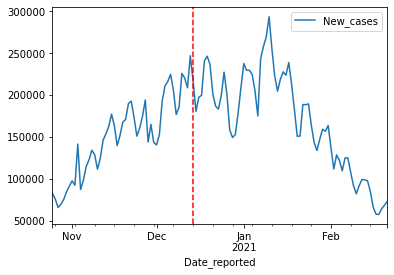

In [377]:
import seaborn as sns
ax1 = subData1.plot.line(x='Date_reported', y='New_cases')
#Get the first vaccination date for USA
first_vax_date = first_vaccine_dates['FIRST_VACCINE_DATE'].loc[first_vaccine_dates['COUNTRY'] == 'United States of America'].values
#plot the first vaccination date on the graph
ax1.axvline(first_vax_date, color="red", linestyle="--")

As shown in the data, the amount of new cases were increasing at a steady rate for 60 days before the first vaccination was given, then on 12/14/2020 (as indicated by the red line), the first vaccines were released and the new cases slowly consolidated between 150,000-250,000 new cases daily before breaking over 300,000 and decreasing at a dramatic rate. Although the rates reached a new high after the vaccines were released, it does not prove that vaccines were not effective, in this case, we have to account for the fact that the big spike may have been due to holiday season (End of December - Early January).

## Machine Learning Analysis:

## Reflection:

## To Do List: 
-Create a subset of adjusted data <br>
-Remove NaN Values <br>
-Check if Unreported dates for vaccination are (ir)relevant <br>
-Remove Country Code, ISO3
-Maybe Remove Vaccine types and vaccine types used

Assumption 3: Remove Columns That We Don't Need